# HW2 - Basic Data Processing for Data Mining

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 5/24 (Thur)  11:59 AM 

------------------------------------------
## __ Ready for Assingment __
-  install [python](https://www.python.org/)

- install python
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard__.


- install libraries
     - install libraries
         - [NumPy](http://docs.scipy.org/doc/numpy-dev/user/index.html), fot arrays
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [requests](http://docs.python-requests.org/en/latest/), for fetching web content
         - [pattern](http://www.clips.ua.ac.be/pages/pattern) or [beautiful soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), for parsing html and xml pages
         
------------------------------------------

### CHECK YOUR PYTHON VERSION
- #### Assingment made by python 3.x
- #### It will be easy for you to use same version with TA

In [1]:
import sys
sys.version

'3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]'

## Python Assingment HW2 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- The necessary libraries are already imported below.
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

In [2]:
%matplotlib inline 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem1. Web Crawling & Processing

### Problem 1-1 Fetching the Wikipedia site

#### print html code of presented page
#### Use requests library
> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>List of 2016 Summer Olympics medal winners - Wikipedia</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_2016_Summer_Olympics_medal_winners"

###YOUR CODE HERE###
data = requests.get(url)
print(data.text)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of 2016 Summer Olympics medal winners - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_2016_Summer_Olympics_medal_winners","wgTitle":"List of 2016 Summer Olympics medal winners","wgCurRevisionId":839965383,"wgRevisionId":839965383,"wgArticleId":44675550,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["2016 Summer Olympics","Lists of Summer Olympic medalists by year","Medalists at the 2016 Summer Olympics","Rio de Janeiro (city)-related lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparato

### Problem 1-2 Parsing html data
#### Data that we are going to use is table titled below:
#### Title: Swimming men's events
#### Use BeautifulSoup libary

*print html code of parsed table: Swimming men's events*

> *`<table border="" class="class1 class2" style="font-size: 100%">`*<br/>
> *`<tr style="text-align: center;">`*<br/>
> *`<th scope="col" style="width: 120px;">Event</th>`*<br/>
> *`...`*<br/>
> *`</td>`*<br/>
> *`</tr>`*<br/>
> *`</table>`*<br/>

__*hint: class/id can be assigned for elements of html.*__

In [4]:
#step1: look at html source!"
#step2: get all tables"
#step3: get table we care about"

###YOUR CODE HERE###
soup = BeautifulSoup(data.text, "lxml")
tables = soup.find_all('table', {'class':'wikitable plainrowheaders'})
print(tables[36])

<table border="1" class="wikitable plainrowheaders" style="font-size: 100%">
<tr style="text-align: center;">
<th scope="col" style="width: 120px;">Event</th>
<th colspan="2" scope="col" style="width: 200px; background: #FFD700;">Gold</th>
<th colspan="2" scope="col" style="width: 200px; background: #CCCCCC;">Silver</th>
<th colspan="2" scope="col" style="width: 200px; background: #CC9966;">Bronze</th>
</tr>
<tr>
<td>50 m freestyle<br/>
<span class="noprint" style="font-size:90%; font-style:italic;"><a href="/wiki/Swimming_at_the_2016_Summer_Olympics_%E2%80%93_Men%27s_50_metre_freestyle" title="Swimming at the 2016 Summer Olympics – Men's 50 metre freestyle">details</a></span></td>
<td><a href="/wiki/Anthony_Ervin" title="Anthony Ervin">Anthony Ervin</a><br/>
<img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.w

### Problem 1-3 Extracting data and filling it into a dictionary(Python data stucture)

#### Extract  countries and medals from "Athletics - Women" table and store it in dictionary.
*Please print parsed dictionary at the end of code*

#### Shape of Dictionary
__Include only once if athlete have received the same medal more than once. ex) 100m gold Bolt, 200m gold Bolt -> gold: Bolt__
- { *country_name*: { *medal type*: [*athlete name,* *athlete name,* *athlete name,* ...], ... }}
- e.g. {'Jamaica': {'Gold': ['Elaine Thompson', 'Shaunae Miller'...], 'Silver': [...], 'Bronze': [...] }, 'United States': ... }

*__hint: Use above problem's code to get Atheletics - Women table__*

In [5]:
# extract headings and actual data and combine data into single dict

###YOUR CODE HERE###

In [6]:
## Get Atheletics Woman Datas
atheletics_women = tables[2]
print(atheletics_women)

<table border="1" class="wikitable plainrowheaders" style="font-size: 100%">
<tr style="text-align: center;">
<th scope="col" style="width: 120px;">Event</th>
<th colspan="2" scope="col" style="width: 200px; background: #FFD700;">Gold</th>
<th colspan="2" scope="col" style="width: 200px; background: #CCCCCC;">Silver</th>
<th colspan="2" scope="col" style="width: 200px; background: #CC9966;">Bronze</th>
</tr>
<tr>
<td>100 metres<br/>
<span class="noprint" style="font-size:90%; font-style:italic;"><a href="/wiki/Athletics_at_the_2016_Summer_Olympics_%E2%80%93_Women%27s_100_metres" title="Athletics at the 2016 Summer Olympics – Women's 100 metres">details</a></span></td>
<td><a href="/wiki/Elaine_Thompson" title="Elaine Thompson">Elaine Thompson</a><br/>
<img alt="" class="thumbborder" data-file-height="300" data-file-width="600" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Jamaica.svg/23px-Flag_of_Jamaica.svg.png" srcset="//upload.wikimedia.org/wikipedia/c

In [7]:
## Get Medal Infos
medals = atheletics_women.find_all("th")[1:]
medals = [medal.text for medal in medals]
medals

['Gold', 'Silver', 'Bronze']

In [8]:
## Get Medalist Infos
medalists = atheletics_women.find_all("td")
medalists = [medalist.find_all('a') for medalist in medalists if (len(medalist.find_all('a')) != 0)]

for i in range(len(medalists)):
    for j in range(len(medalists[i])):
        medalists[i][j] = medalists[i][j].text
        
        if len(medalists[i][j]) == 2:
            del medalists[i][j]

medalists = [medalists[i] for i in range(len(medalists)) if len(medalists[i]) != 0]
medalists

[['details'],
 ['Elaine Thompson', 'Jamaica'],
 ['Tori Bowie', 'United States'],
 ['Shelly-Ann Fraser-Pryce', 'Jamaica'],
 ['details'],
 ['Elaine Thompson', 'Jamaica'],
 ['Dafne Schippers', 'Netherlands'],
 ['Tori Bowie', 'United States'],
 ['details'],
 ['Shaunae Miller', 'Bahamas'],
 ['Allyson Felix', 'United States'],
 ['Shericka Jackson', 'Jamaica'],
 ['details'],
 ['Caster Semenya', 'South Africa'],
 ['Francine Niyonsaba', 'Burundi'],
 ['Margaret Wambui', 'Kenya'],
 ['details'],
 ['Faith Kipyegon', 'Kenya'],
 ['Genzebe Dibaba', 'Ethiopia'],
 ['Jennifer Simpson', 'United States'],
 ['details'],
 ['Vivian Cheruiyot', 'Kenya'],
 ['Hellen Onsando Obiri', 'Kenya'],
 ['Almaz Ayana', 'Ethiopia'],
 ['details'],
 ['Almaz Ayana', 'Ethiopia'],
 ['Vivian Cheruiyot', 'Kenya'],
 ['Tirunesh Dibaba', 'Ethiopia'],
 ['details'],
 ['Brianna Rollins', 'United States'],
 ['Nia Ali', 'United States'],
 ['Kristi Castlin', 'United States'],
 ['details'],
 ['Dalilah Muhammad', 'United States'],
 ['Sara Pe

In [9]:
## Split Medalists using medal type
gold_medalists = [medalists[i] for i in range(1, len(medalists), 4)]
silver_medalists = [medalists[i] for i in range(2, len(medalists), 4)]
bronze_medalists = [medalists[i] for i in range(3, len(medalists), 4)]
medalists = [gold_medalists, silver_medalists, bronze_medalists]

In [10]:
atheletics_women_medalists = {}

In [11]:
## Using Medal and Medalists Infos, Fill dict
for i in range(3):
    for medalist in medalists[i]:
        if len(medalist) == 2:
            if medalist[1] in atheletics_women_medalists and medals[i] in atheletics_women_medalists[medalist[1]]:
                atheletics_women_medalists[medalist[1]][medals[i]].append(medalist[0])
            else:
                if medalist[1] in atheletics_women_medalists:
                    atheletics_women_medalists[medalist[1]][medals[i]] = [medalist[0]]
                else:
                    atheletics_women_medalists[medalist[1]] = {medals[i]: [medalist[0]]}
        else:
            if medalist[0] in atheletics_women_medalists and medals[i] in atheletics_women_medalists[medalist[0]]:
                atheletics_women_medalists[medalist[0]][medals[i]].extend(medalist[1:])
            else:
                if medalist[0] in atheletics_women_medalists:
                    atheletics_women_medalists[medalist[0]][medals[i]] = medalist[1:]
                else:
                    atheletics_women_medalists[medalist[0]] = {medals[i]: medalist[1:]}

In [12]:
## Delete Duplicate Data
for country in atheletics_women_medalists:
    for medal in medals:
        if medal in atheletics_women_medalists[country]:
            atheletics_women_medalists[country][medal] = list(set(atheletics_women_medalists[country][medal]))

In [13]:
atheletics_women_medalists

{'Bahamas': {'Gold': ['Shaunae Miller']},
 'Bahrain': {'Gold': ['Ruth Jebet'], 'Silver': ['Eunice Kirwa']},
 'Belgium': {'Gold': ['Nafissatou Thiam']},
 'Bulgaria': {'Silver': ['Mirela Demireva']},
 'Burundi': {'Silver': ['Francine Niyonsaba']},
 'Canada': {'Bronze': ['Brianne Theisen-Eaton']},
 'China': {'Bronze': ['Lü Xiuzhi'],
  'Gold': ['Liu Hong'],
  'Silver': ['Zhang Wenxiu']},
 'Colombia': {'Gold': ['Caterine Ibargüen']},
 'Croatia': {'Bronze': ['Blanka Vlašić'],
  'Gold': ['Sandra Perković', 'Sara Kolak']},
 'Cuba': {'Bronze': ['Denia Caballero']},
 'Czech Republic': {'Bronze': ['Barbora Špotáková']},
 'Denmark': {'Silver': ['Sara Petersen']},
 'Ethiopia': {'Bronze': ['Mare Dibaba', 'Tirunesh Dibaba', 'Almaz Ayana'],
  'Gold': ['Almaz Ayana'],
  'Silver': ['Genzebe Dibaba']},
 'France': {'Silver': ['Mélina Robert-Michon']},
 'Great Britain': {'Bronze': ['Daryll Neita',
   'Dina Asher-Smith',
   'Christine Ohuruogu',
   'Sophie Hitchon',
   'Asha Philip',
   'Anyika Onuora',
   

### Problem 1-4 Creating a dataframe(Python data structure) from a dictionary

#### Use Dictionary that you made in problem 1-3

#### Use Pandas library

__* Shape of dataframe must be like following table.__
<table>
  <tr>
    <th></th>
    <th>Gold</th>
    <th>Silver</th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>Jamaica</td>
    <td>Elaine Thompson, Shaunae Miller ... </td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>United States</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
</table>

In [14]:
# create dataframe
# Use the following code
# indices: countries, columns: Medal type

###YOUR CODE HERE###
df = pd.DataFrame.from_dict(atheletics_women_medalists, orient='index')
df

,Gold,Silver,Bronze
Bahamas,[Shaunae Miller],NaN,NaN
Bahrain,[Ruth Jebet],[Eunice Kirwa],NaN
Belgium,[Nafissatou Thiam],NaN,NaN
Bulgaria,NaN,[Mirela Demireva],NaN
Burundi,NaN,[Francine Niyonsaba],NaN
Canada,NaN,NaN,[Brianne Theisen-Eaton]
China,[Liu Hong],[Zhang Wenxiu],[Lü Xiuzhi]
Colombia,[Caterine Ibargüen],NaN,NaN
Croatia,"[Sandra Perković, Sara Kolak]",NaN,[Blanka Vlašić]
Cuba,NaN,NaN,[Denia Caballero]


### Problem 1-5 Sort Data Frame
### Sort Country names by number of Gold medal athletes (Descending order)
- __Show in table form (e.g. pd.DataFrame.describe())__
<table>
  <tr>
    <th></th>
    <th>Gold</th>
    <th>Silver</th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>Jamaica</td>
    <td>Elaine Thompson, Shaunae Miller ... </td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>United States</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
</table>

In [15]:
###YOUR CODE HERE###

## Get Gold_count
tmp = df['Gold'].fillna('0')
Gold_count = []
for i in tmp:
    if i is not '0':
        Gold_count.append(len(i))
    else:
        Gold_count.append(0)

In [16]:
## Insert Gold_count in df
df.insert(loc = 3, column = 'count', value = Gold_count)

In [17]:
## Sort df using Gold_count
df.sort_values(by='count', ascending=False, inplace=True)

In [18]:
## Delete Gold_count column that is unused
del df['count']

In [19]:
df

,Gold,Silver,Bronze
United States,"[English Gardner, Phyllis Francis, Taylor Elli...","[Sandi Morris, Allyson Felix, Nia Ali, Britney...","[Kristi Castlin, Emma Coburn, Ashley Spencer, ..."
Kenya,"[Faith Kipyegon, Vivian Cheruiyot, Jemima Sumg...","[Vivian Cheruiyot, Hyvin Jepkemoi, Hellen Onsa...",[Margaret Wambui]
Croatia,"[Sandra Perković, Sara Kolak]",NaN,[Blanka Vlašić]
Bahamas,[Shaunae Miller],NaN,NaN
Greece,[Ekaterini Stefanidi],NaN,NaN
Bahrain,[Ruth Jebet],[Eunice Kirwa],NaN
Ethiopia,[Almaz Ayana],[Genzebe Dibaba],"[Mare Dibaba, Tirunesh Dibaba, Almaz Ayana]"
Poland,[Anita Włodarczyk],NaN,NaN
Jamaica,[Elaine Thompson],"[Anneisha McLaughlin-Whilby, Veronica Campbell...","[Shericka Jackson, Shelly-Ann Fraser-Pryce]"
Colombia,[Caterine Ibargüen],NaN,NaN


### Problem 1-6 Handle Data Frame
### Which country has the most bronze medals in Atheletics - Women? 
- __Make sub data frame__
- __Show in table form (e.g. pd.DataFrame.describe())__
<table>
  <tr>
    <th></th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>United States</td>
    <td>Tori Bowie ...</td>
</table>

In [20]:
###YOUR CODE HERE###

## Get bronze_count
tmp = df['Bronze'].fillna('0')
Bronze_count = []
for i in tmp:
    if i is not '0':
        Bronze_count.append(len(i))
    else:
        Bronze_count.append(0)

In [21]:
## Insert Bronze_count in df
df.insert(loc = 3, column = 'Bronze_count', value = Bronze_count)

In [22]:
## Sort df using Bronze_count
df.sort_values(by='Bronze_count', ascending=False, inplace=True)

In [23]:
df['Bronze']

Great Britain     [Daryll Neita, Dina Asher-Smith, Christine Ohu...
United States     [Kristi Castlin, Emma Coburn, Ashley Spencer, ...
Ethiopia                [Mare Dibaba, Tirunesh Dibaba, Almaz Ayana]
Jamaica                 [Shericka Jackson, Shelly-Ann Fraser-Pryce]
Kenya                                             [Margaret Wambui]
Canada                                      [Brianne Theisen-Eaton]
Cuba                                              [Denia Caballero]
Czech Republic                                  [Barbora Špotáková]
Hungary                                              [Anita Márton]
Kazakhstan                                          [Olga Rypakova]
Serbia                                             [Ivana Španović]
New Zealand                                       [Eliza McCartney]
Croatia                                             [Blanka Vlašić]
China                                                   [Lü Xiuzhi]
Spain                                           

## Project Problem 1
- __URL : https://en.wikipedia.org/wiki/List_of_Intel_microprocessors __
- __Crawl "7th generation Core/Kaby Lake/Skylake (X-series Processors)/Apollo Lake - desktop" table in given URL__
- __Make data frame same as in wiki page with cralwed table (Show in table form)__
- __Sort model name by "Base Frequency" (Show in table form)__ 

In [24]:
###YOUR CODE HERE###

## Get Wiki Data
url = "https://en.wikipedia.org/wiki/List_of_Intel_microprocessors"

data = requests.get(url)
soup = BeautifulSoup(data.text, "lxml")

In [25]:
###YOUR CODE HERE###

## Get Table
tables = soup.find_all('table', {'class':'wikitable sortable'})
table = tables[2]
table

<table class="wikitable sortable" style="text-align: center;">
<tr>
<th>Model</th>
<th>Price (USD)</th>
<th>Cores/Threads</th>
<th>Base <a href="/wiki/Clock_rate" title="Clock rate">frequency</a> (GHz)</th>
<th>Max <a href="/wiki/Intel_Turbo_Boost" title="Intel Turbo Boost">turbo</a> frequency (GHz)</th>
<th><a class="mw-redirect" href="/wiki/Intel_HD_and_Iris_Graphics" title="Intel HD and Iris Graphics">GPU</a></th>
<th>Maximum GPU<br/>
clock rate (MHz)</th>
<th>L3<br/>
cache (MB)</th>
<th>TDP (W)</th>
<th>Socket</th>
<th>Release</th>
</tr>
<tr>
<td><a class="external text" href="https://ark.intel.com/products/126699/Intel-Core-i9-7980XE-X-series-Processor-24_75M-Cache-up-to-4_20-" rel="nofollow">i9-7980XE</a></td>
<td>$1999</td>
<td data-sort-value="26">18/36</td>
<td>2.6</td>
<td>4.2</td>
<td>N/A</td>
<td>N/A</td>
<td>24.75</td>
<td>165</td>
<td><a href="/wiki/LGA_2066" title="LGA 2066">LGA 2066</a></td>
<td>Q3 2017<sup class="reference" id="cite_ref-:0_1-0"><a href="#cite_note-:0-1

In [26]:
## Get Table Attributes
attributes = table.find_all("tr")[0].find_all("th")
attributes = [attribute.text for attribute in attributes]
attributes

['Model',
 'Price (USD)',
 'Cores/Threads',
 'Base frequency (GHz)',
 'Max turbo frequency (GHz)',
 'GPU',
 'Maximum GPU\nclock rate (MHz)',
 'L3\ncache (MB)',
 'TDP (W)',
 'Socket',
 'Release']

In [27]:
## Get Table Records
records = table.find_all("tr")[1:]
records = [record.find_all("td") for record in records]
records = [[record.text for record in records[i]] for i in range(len(records))]
records

[['i9-7980XE',
  '$1999',
  '18/36',
  '2.6',
  '4.2',
  'N/A',
  'N/A',
  '24.75',
  '165',
  'LGA 2066',
  'Q3 2017[1]'],
 ['i9-7960X',
  '$1699',
  '16/32',
  '2.8',
  '4.2',
  'N/A',
  'N/A',
  '22.00',
  '165',
  'LGA 2066',
  'Q3 2017[1]'],
 ['i9-7940X',
  '$1399',
  '14/28',
  '3.1',
  '4.3',
  'N/A',
  'N/A',
  '19.25',
  '165',
  'LGA 2066',
  'Q3 2017[1]'],
 ['i9-7920X',
  '$1189',
  '12/24',
  '2.9',
  '4.3',
  'N/A',
  'N/A',
  '16.50',
  '140',
  'LGA 2066',
  'Q3 2017'],
 ['i9-7900X',
  '$999',
  '10/20',
  '3.3',
  '4.3',
  'N/A',
  'N/A',
  '13.75',
  '140',
  'LGA 2066',
  'Q2 2017'],
 ['i7-7820X',
  '$599',
  '8/16',
  '3.6',
  '4.3',
  'N/A',
  'N/A',
  '11.00',
  '140',
  'LGA 2066',
  'Q2 2017'],
 ['i7-7800X',
  '$389',
  '6/12',
  '3.5',
  '4.0',
  'N/A',
  'N/A',
  '8.25',
  '140',
  'LGA 2066',
  'Q2 2017'],
 ['i7-7740X',
  '$350',
  '4/8',
  '4.3',
  '4.5',
  'N/A',
  'N/A',
  '8',
  '112',
  'LGA 2066',
  'Q1 2017'],
 ['i7-7700K',
  '$350',
  '4/8',
  '4.2',
 

In [28]:
###YOUR CODE HERE###

## Make DataFrame
df = pd.DataFrame(records, columns = attributes)
df

,Model,Price (USD),Cores/Threads,Base frequency (GHz),Max turbo frequency (GHz),GPU,Maximum GPU clock rate (MHz),L3 cache (MB),TDP (W),Socket,Release
0,i9-7980XE,$1999,18/36,2.6,4.2,N/A,N/A,24.75,165,LGA 2066,Q3 2017[1]
1,i9-7960X,$1699,16/32,2.8,4.2,N/A,N/A,22.00,165,LGA 2066,Q3 2017[1]
2,i9-7940X,$1399,14/28,3.1,4.3,N/A,N/A,19.25,165,LGA 2066,Q3 2017[1]
3,i9-7920X,$1189,12/24,2.9,4.3,N/A,N/A,16.50,140,LGA 2066,Q3 2017
4,i9-7900X,$999,10/20,3.3,4.3,N/A,N/A,13.75,140,LGA 2066,Q2 2017
5,i7-7820X,$599,8/16,3.6,4.3,N/A,N/A,11.00,140,LGA 2066,Q2 2017
6,i7-7800X,$389,6/12,3.5,4.0,N/A,N/A,8.25,140,LGA 2066,Q2 2017
7,i7-7740X,$350,4/8,4.3,4.5,N/A,N/A,8,112,LGA 2066,Q1 2017
8,i7-7700K,$350,4/8,4.2,4.5,HD 630,1150,8,91,LGA 1151,Q1 2017
9,i7-7700,$312,4/8,3.6,4.2,HD 630,1150,8,65,LGA 1151,Q1 2017


In [29]:
###YOUR CODE HERE###

## Sort by base frequency
df.sort_values(by='Base frequency (GHz)', ascending=True, inplace=True)
df

,Model,Price (USD),Cores/Threads,Base frequency (GHz),Max turbo frequency (GHz),GPU,Maximum GPU clock rate (MHz),L3 cache (MB),TDP (W),Socket,Release
18,i5-7400T,$187,4/4,2.4,3.0,HD 630,1000,6,35,LGA 1151,Q1 2017
0,i9-7980XE,$1999,18/36,2.6,4.2,N/A,N/A,24.75,165,LGA 2066,Q3 2017[1]
16,i5-7500T,$202,4/4,2.7,3.3,HD 630,1100,6,35,LGA 1151,Q1 2017
34,G3930T,$42,2/2,2.7,N/A,HD 610,1000,2,35,LGA 1151,Q1 2017
1,i9-7960X,$1699,16/32,2.8,4.2,N/A,N/A,22.00,165,LGA 2066,Q3 2017[1]
14,i5-7600T,$224,4/4,2.8,3.7,HD 630,1100,6,35,LGA 1151,Q1 2017
31,G4560T,$64,2/4,2.9,N/A,HD 610,1050,3,35,LGA 1151,Q1 2017
3,i9-7920X,$1189,12/24,2.9,4.3,N/A,N/A,16.50,140,LGA 2066,Q3 2017
10,i7-7700T,$312,4/8,2.9,3.8,HD 630,1150,8,35,LGA 1151,Q1 2017
33,G3930,$42,2/2,2.9,N/A,HD 610,1050,2,51,LGA 1151,Q1 2017


In [30]:
###YOUR CODE HERE###

## Show model name sorted by Base Frequency
pd.DataFrame(df['Model'])

,Model
18,i5-7400T
0,i9-7980XE
16,i5-7500T
34,G3930T
1,i9-7960X
14,i5-7600T
31,G4560T
3,i9-7920X
10,i7-7700T
33,G3930


## Problem2. Processing Data with Data Frame

### Fetching data from tsv(tab-separated values)
We will give you GDP per capita in tsv format.
(Gross domestic product per capita, current prices in USD; International Monetary Fund, World Economic Outlook Database, October 2016) 

What you have to do is read data from tsv, put it in pandas dataframe, manipulate data so that it is ready for analyse.

In [31]:
tsv = pd.read_csv('GDPperCapByTab.txt',sep='\t',index_col=0) 
# this will let you read data from file name ~~ , and understand <tab> as delimiter

tsv # You can check whether data is correctly loaded in your df(;tsv) or not

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,NaN,NaN,NaN,NaN,NaN,...,324.705,380.91,435.472,539.667,614.661,680.5,660.221,650.663,615.091,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",704.588,791.287,798.011,790.099,764.21,764.529,...,"3,594.10","4,377.04","4,130.93","4,098.13","4,439.56","4,249.04","4,413.28","4,574.80","3,946.00",2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","2,268.61","2,305.51","2,254.33","2,316.68","2,432.72","2,753.70",...,"3,986.56","4,943.50","3,886.06","4,480.72","5,430.57","5,574.20","5,475.71","5,458.88","4,174.82",2015.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",668.88,609.544,593.834,603.066,622.792,680.914,...,"2,882.80","3,897.51","3,393.55","3,599.27","4,411.58","4,744.88","4,988.92","4,915.92","3,876.20",2015.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,920.27","2,177.10","2,448.57","2,752.96","3,200.97","3,764.00",...,"15,725.92","16,259.67","14,403.92","13,413.49","13,205.07","13,929.37","13,733.96","13,818.57","14,100.43",2011.0
Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","8,106.24","6,467.99","3,158.51","3,841.89","4,241.38","3,149.68",...,"7,315.73","9,146.79","8,337.81","10,412.95","12,787.81","13,889.79","14,488.83","13,208.83","14,616.72",2013.0
Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,NaN,NaN,NaN,NaN,NaN,...,"3,079.03","3,913.44","2,911.76","3,128.48","3,426.39","3,575.53","3,732.04","3,889.00","3,520.95",2014.0
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","11,000.99","12,521.00","12,227.53","11,585.13","12,567.63","10,961.08",...,"45,127.40","49,190.01","45,584.23","56,330.16","66,769.42","68,028.94","64,664.26","61,165.63","51,180.95",2015.0
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","10,707.97","9,259.99","9,246.95","9,396.19","8,862.78","9,070.48",...,"46,652.91","51,629.66","47,785.55","46,757.11","51,192.58","48,372.14","50,586.42","51,215.50","43,413.63",2015.0


### Problem 2-1 Data Cleaning
1. Drop everything but "name of country" and "data by year(1980 ~ 2010)".
2. Modify data so that you can change it to float type number. (For example, u'1,421.84' can not be changed to float while "," exists.) 'NaN' can be changed to np.nan.
<br><b>Hint, you can change type of whole data to float in one instuction if your data is in good format. </b>

In [32]:
###YOUR CODE HERE###

#TODO: Drop everything but "name of country" and "data by year(1980 ~ 2010)".
tsv.drop(columns = ['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', '2011', '2012', '2013', '2014', '2015', 'Estimates Start After'], inplace = True)

#TODO: modify data suitable to change data type, like n/a to np.nan, etcs
tsv.fillna(np.nan, inplace = True)

In [33]:
drop_index = []

#TODO: modify data type as float type
for columnNum in [str(num) for num in range(1980, 2011)]:
    for i in range(len(tsv[columnNum])):
        if isinstance(tsv[columnNum][i], str):
            tsv[columnNum][i] = np.float(tsv[columnNum][i].replace(',', ''))
        else:
            drop_index.append(tsv.index[i])

## Delete Nan rows
drop_index = list(set(drop_index))
tsv.drop(drop_index, inplace = True)

In [34]:
tsv

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,,,,,,
Albania,704.588,791.287,798.011,790.099,764.21,764.529,829.098,806.596,779.387,839.702,...,1283.57,1425.13,1846.12,2373.58,2673.73,2975.62,3594.1,4377.04,4130.93,4098.13
Algeria,2268.61,2305.51,2254.33,2316.68,2432.72,2753.7,2698.92,2705.11,2143.74,2127.87,...,1768.58,1806.86,2128.39,2636.31,3141.03,3508.96,3986.56,4943.5,3886.06,4480.72
Angola,668.88,609.544,593.834,603.066,622.792,680.914,619.801,690.823,729.631,826.108,...,508.857,690.923,761.596,1023.52,1428.46,2052.72,2882.8,3897.51,3393.55,3599.27
Antigua and Barbuda,1920.27,2177.1,2448.57,2752.96,3200.97,3764,4617.6,5455.28,6547.27,7273.22,...,10063.8,10326.9,10694,11315.2,12428.7,13995,15725.9,16259.7,14403.9,13413.5
Argentina,8106.24,6467.99,3158.51,3841.89,4241.38,3149.68,3739.41,3790.75,4386.53,2779.87,...,7851.66,2898.29,3648.06,4314.4,5163.55,5976.08,7315.73,9146.79,8337.81,10413
Australia,11001,12521,12227.5,11585.1,12567.6,10961.1,11238.5,12991,16238.9,18169.3,...,19420.7,21628.7,27225.8,32762.1,36143.6,37869.7,45127.4,49190,45584.2,56330.2
Austria,10708,9259.99,9246.95,9396.19,8862.78,9070.48,12857.3,16057,17593.4,17508.6,...,24510.8,26444.1,32176.9,36754.5,38319.4,40469.9,46652.9,51629.7,47785.6,46757.1
The Bahamas,9657.73,9818.39,10803.1,11755.5,12280.7,13200.8,14028.1,15187.7,15468.6,17143.1,...,21200.7,22310.5,21970.8,22124.1,23714.4,24215.2,24987.8,24481.9,22952.5,22957.8
Bahrain,10189.6,11061.4,11221.7,11117.7,11163.4,10182.4,7695.81,8049.36,9602.79,9668.04,...,13891.3,13498.6,14482.9,15960.5,17962.3,19263.4,20903.8,23231,19461.1,20823.2


In [35]:
print(tsv.index[0],tsv.iloc[0,0], type(tsv.ix[0,0]))

Albania 704.588 <class 'float'>


C:\Users\Jinhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


### Problem 2-2 Data  Grouping
### Get median value by country of each 5 years from 1980 to 2010
- __Condition 1 : Data should be in "int" type (numpy.int64 or else)__ 
- __Condition 2 : Dataframe should be in the form of given output (two cells below)__

In [36]:
resulttsv = tsv
# Think wisely! It does not require long code. For me, 3 lines were enough. You can do it :)

###YOUR CODE HERE###

## Data -> Int type
resulttsv = resulttsv.astype('int64')

## ColumnNums
columnNums = [
['1980', '1981', '1982', '1983', '1984', '1985'],
['1985', '1986', '1987', '1988', '1989', '1990'],
['1990', '1991', '1992', '1993', '1994', '1995'],
['1995', '1996', '1997', '1998', '1999', '2000'],
['2000', '2001', '2002', '2003', '2004', '2005'],
['2005', '2006', '2007', '2008', '2009', '2010']
]

## Get Median value by country of each 5 years
for columnNum in columnNums:
    resulttsv[str(columnNum[0]) + '-' + str(columnNum[-1])] = resulttsv[columnNum].median(axis = 'columns')
    resulttsv.drop(columnNum[:5], 1, inplace = True)
resulttsv.drop('2010', 1, inplace = True)

## Data -> Int type
resulttsv = resulttsv.astype('int64')

In [37]:
print(resulttsv.index[1],resulttsv.ix[1,0],type(resulttsv.ix[1,0]))
resulttsv.head()

Algeria 2310 <class 'numpy.int64'>


C:\Users\Jinhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Albania,777,792,563,963,1635,3846
Algeria,2310,2585,1846,1638,1967,3936
Angola,615,709,531,417,725,3137
Antigua and Barbuda,2600,6001,8279,9876,10530,14199
Argentina,4041,3764,7489,8419,4738,7826


### Problem 2-3 Data  Filtering
### Filter Rows Where Median Value(1995 - 2000) Is Greater Than 10000
- __Hint, If you are not familiar with data filtering using pandas.dataframe, Please refer to the following link below  . __
    - __https://pythonspot.com/pandas-filter/__

In [38]:
###YOUR CODE HERE###
filtered_tsv = resulttsv[(resulttsv['1995-2000'] > 10000)]

In [39]:
print(filtered_tsv.index[1],filtered_tsv.ix[1,0],type(filtered_tsv.ix[1,0]))
filtered_tsv.head()

Austria 9252 <class 'numpy.int64'>


C:\Users\Jinhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Australia,11906,14614,18734,21340,24426,45355
Austria,9252,16782,24555,27240,29310,46704
The Bahamas,11279,15327,15445,17726,22047,23964
Bahrain,11089,9635,10910,12217,14346,20142
Barbados,4826,7074,8156,10234,11880,16314


### Problem 2-4 Get Infant Mortality rate

### We need data from 1980-2010. Drop data which is not necessary


In [40]:
IMtsv = pd.read_csv('InfantMortalityByTab.txt',sep='\t',index_col=0)
###YOUR CODE HERE###

In [41]:
IMtsv.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Venezuela',
       'Vietnam', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=175)

In [42]:
columnNames = [str(x) + '-' + str(x+5) for x in range(1980, 2010, 5)]
DroppedIMtsv = IMtsv[columnNames]

In [43]:
DroppedIMtsv.head()

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Afghanistan,159.16,134.14,111.31,98.68,89.53,79.51
Albania,43.20,37.84,30.74,26.30,20.25,16.11
Algeria,75.37,55.38,47.67,41.92,37.45,34.18
Angola,157.11,153.18,150.66,138.01,116.05,104.35
Argentina,32.20,27.13,24.36,21.85,15.04,14.61


## Problem3. Draw data as a plot

### Problem 3-1 Define a function to draw catter plot which contained trendline.
#### use .scatter from matplotlib library.
- please print *<b>line equation</b>* and *<b>MSE(mean squared error)</b>* for each plots
- matplotlib.pyplot.scatter: http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter
- you can find example of trendline on matplotlib very easily.

y=0.187871x+(415.675579)
MeanSquaredError:  49752.402400893625


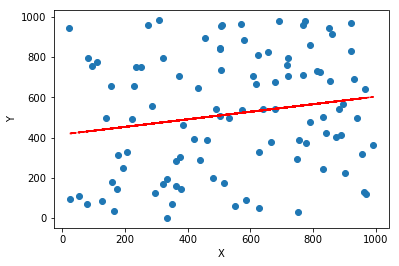

In [44]:
def plot_2D_trendline(x_data, y_data, pred=None, x_label='X', y_label='Y', title=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data)
    
    if pred is not None:
        plt.plot(x_data, pred, color='red', linewidth=2)
    if title is not None:
        plt.title(title)
    
    # the line equation:
    a, b = np.polyfit(x_data, y_data, 1)
    p = np.poly1d([a, b])
    plt.plot(x_data, p(x_data),"r--")
    print ("y=%.6fx+(%.6f)" % (a, b))
    
    #print Mean Squared Error
    mse = np.square(np.subtract(x_data, p(x_data))).mean()
    print ("MeanSquaredError: ", mse)
    
    plt.show()

# Let's see if the function works.
plot_2D_trendline(np.random.randint(1000,size=100),np.random.randint(1000,size=100))

### Problem 3-2 Draw scatter plot and trendline by using infant mortality rate and GDP per capita
- x-axis: *GDP per cap*, y-axis: *infant mortality*
- one plot per 5-year period (total 7 plots)
- The trend line may seem somewhat meaningless, but it isn't problem now.

In [45]:
for country in DroppedIMtsv.index:
    if country not in resulttsv.index:
        DroppedIMtsv.drop(country, inplace = True)

for country in resulttsv.index:
    if country not in DroppedIMtsv.index:
        resulttsv.drop(country, inplace = True)

C:\Users\Jinhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
DroppedIMtsv.head()

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Albania,43.20,37.84,30.74,26.30,20.25,16.11
Algeria,75.37,55.38,47.67,41.92,37.45,34.18
Angola,157.11,153.18,150.66,138.01,116.05,104.35
Argentina,32.20,27.13,24.36,21.85,15.04,14.61
Australia,9.86,8.79,6.74,5.52,4.94,4.48


In [47]:
resulttsv.head()

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Albania,777,792,563,963,1635,3846
Algeria,2310,2585,1846,1638,1967,3936
Angola,615,709,531,417,725,3137
Argentina,4041,3764,7489,8419,4738,7826
Australia,11906,14614,18734,21340,24426,45355


y=-0.004678x+(79.303465)
MeanSquaredError:  46455063.34172976


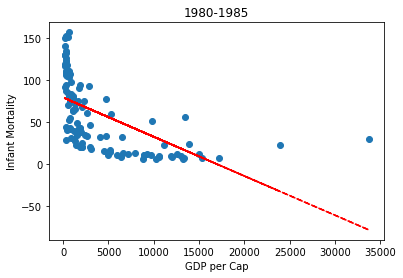

y=-0.003761x+(73.260688)
MeanSquaredError:  77234496.95655987


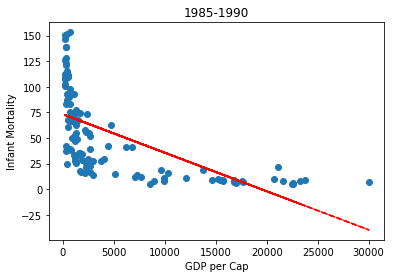

y=-0.002674x+(68.256355)
MeanSquaredError:  142572075.19420296


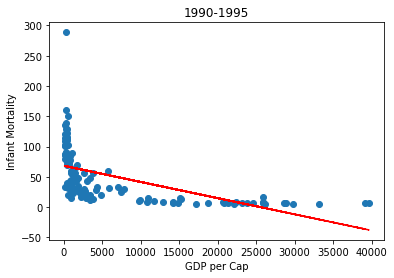

y=-0.002070x+(59.471840)
MeanSquaredError:  192066291.08829525


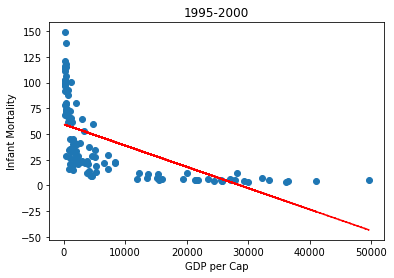

y=-0.001524x+(51.344887)
MeanSquaredError:  260731562.36333403


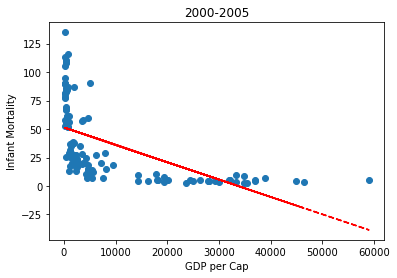

y=-0.000815x+(43.726380)
MeanSquaredError:  644274370.272956


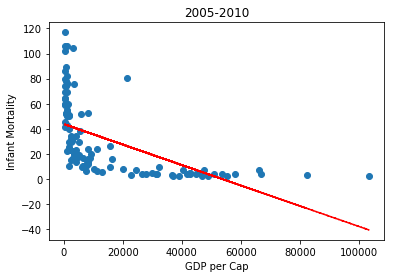

In [48]:
for years in DroppedIMtsv.columns:
    xData=np.array(resulttsv[years])
    yData=np.array(DroppedIMtsv[years])
    
    #TODO
    plot_2D_trendline(xData, yData, x_label='GDP per Cap', y_label='Infant Mortality', title=years)

### Problem 3-3 Let's make trend line meaningful.
- As mentioned, the trend line is somewhat meaningless.
- By applying a *<b>logarithmic scale</b>* on the data, you can make trendlines more meaningful.
<br/>    ** hint: Most of mathmetical functions in python can be found in numpy.*

y=-0.565204x+(7.928067)
MeanSquaredError:  18.395525470898825


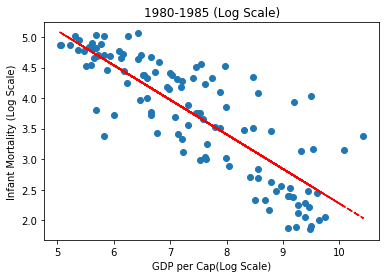

y=-0.599296x+(8.095381)
MeanSquaredError:  21.318506618366992


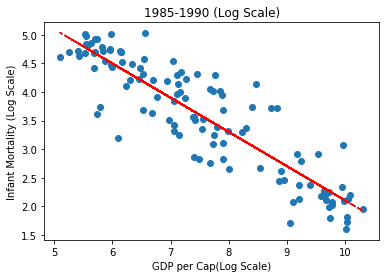

y=-0.581584x+(7.901211)
MeanSquaredError:  24.87985133516846


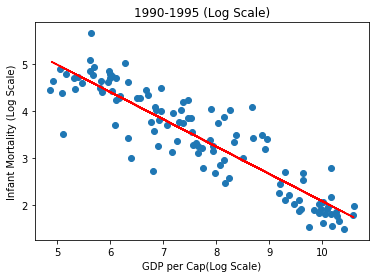

y=-0.615064x+(8.084892)
MeanSquaredError:  28.47081909784953


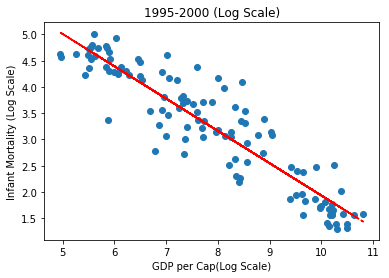

y=-0.606988x+(7.920423)
MeanSquaredError:  31.32916769569365


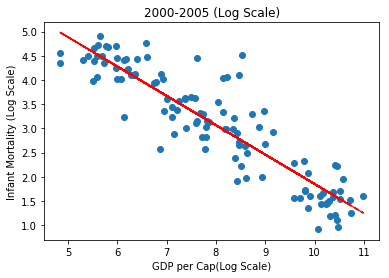

y=-0.619019x+(8.174116)
MeanSquaredError:  38.51988463450962


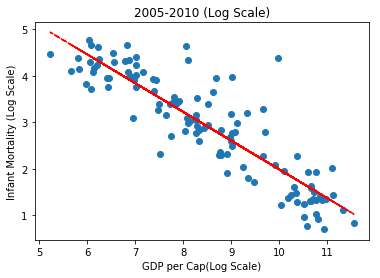

In [49]:
for years in DroppedIMtsv.columns:
    xData=np.array(resulttsv[years])
    yData=np.array(DroppedIMtsv[years])
    
    #TODO
    xDataLog = np.log(xData)
    yDataLog = np.log(yData)
    plot_2D_trendline(xDataLog, yDataLog, x_label='GDP per Cap(Log Scale)', y_label='Infant Mortality (Log Scale)', title=years+" (Log Scale)")

## Project Problem 2&3
- __Read Data forestfires.csv. Keep it mind this data is not tsv!__
- __Sorting & Filtering Data, each sub questions are independent, not related to each other. __
    - Filter rows which event occured in 1st quarter (January to April).
    - Filter rows where area is greater than average area value, and report average value also.
    - Sort descending order by FFMC value which event occured in Friday.
- __Draw plot with following directions, each sub questions are independent, not related to each other.__
    - Draw plot only using X, Y value, so we can know which part of park frequently fired.
    - Draw plot only using temp and wind, so we can know the relation between two features. Also draw trend line.
    - Draw plot only using temp and RH, so we can know the relation between two features. Also draw trend line.
    - Draw plot only using wind and RH, so we can know the relation between two features. Also draw trend line.

In [50]:
###YOUR CODE HERE###

In [63]:
FF = pd.read_csv('forestfires.csv')

In [67]:
FF.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [68]:
filtered_month = ['jan', 'feb', 'mar', 'apr']

In [88]:
for month in filtered_month:
    FF = FF[FF.month != month]

In [51]:
###YOUR CODE HERE###

In [98]:
FF = pd.read_csv('forestfires.csv')

In [99]:
FF_area_mean = FF['area'].mean()
FF_area_mean

12.847292069632491

In [100]:
FF = FF[FF.area > FF_area_mean]

In [101]:
FF.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
203,8,6,oct,wed,91.4,37.9,673.8,5.2,20.2,37,2.7,0.0,13.70
204,5,6,mar,sat,90.6,50.1,100.4,7.8,15.1,64,4.0,0.0,13.99
205,4,5,sep,thu,92.9,137.0,706.4,9.2,22.1,34,1.8,0.0,14.57
206,2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45


In [52]:
###YOUR CODE HERE###

In [108]:
FF = pd.read_csv('forestfires.csv')

In [109]:
FF = FF[FF.day == 'fri']

In [118]:
FF.sort_values(by = 'FFMC', ascending = False, inplace = True)

In [120]:
FF.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
493,1,3,aug,fri,95.9,158.0,633.6,11.3,27.5,29,4.5,0.0,43.32
492,1,3,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,0.00
388,6,4,aug,fri,94.8,227.0,706.7,12.0,23.3,34,3.1,0.0,28.74
402,9,9,aug,fri,94.8,227.0,706.7,12.0,25.0,36,4.0,0.0,0.00
389,7,4,aug,fri,94.8,227.0,706.7,12.0,23.3,34,3.1,0.0,0.00


In [53]:
###YOUR CODE HERE###

In [121]:
FF = pd.read_csv('forestfires.csv')

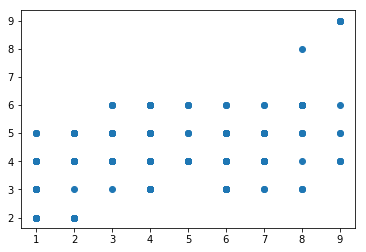

In [129]:
plt.scatter(FF['X'], FF['Y'])

y=-0.070077x+(5.341306)
MeanSquaredError:  259.6968833152638


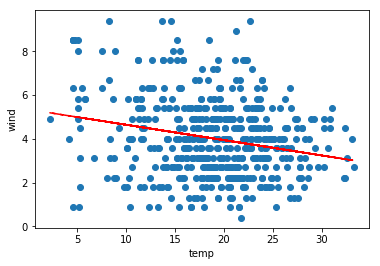

In [130]:
###YOUR CODE HERE###
plot_2D_trendline(FF['temp'], FF['wind'], x_label='temp', y_label='wind')

y=-1.482044x+(72.282784)
MeanSquaredError:  852.4235221027698


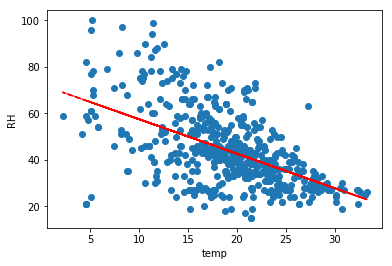

In [131]:
###YOUR CODE HERE###
plot_2D_trendline(FF['temp'], FF['RH'], x_label='temp', y_label='RH')

y=0.632152x+(41.748467)
MeanSquaredError:  1622.1547078235492


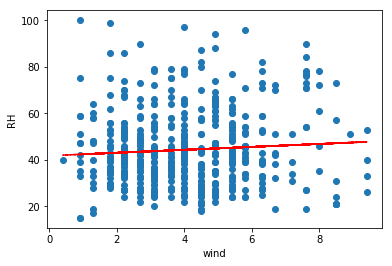

In [132]:
###YOUR CODE HERE###
plot_2D_trendline(FF['wind'], FF['RH'], x_label='wind', y_label='RH')

# FINISH